<a href="https://colab.research.google.com/github/Killeryoung/NM/blob/main/%D0%9F%D1%96%D0%B4%D1%81%D1%83%D0%BC%D0%BA%D0%BE%D0%B2%D0%B5_%D0%B7%D0%B0%D0%B2%D0%B4%D0%B0%D0%BD%D0%BD%D1%8F_%D0%86%D0%BD%D1%82%D0%B5%D1%80%D0%BF%D0%BE%D0%BB%D1%8F%D1%86%D1%96%D1%8F_%D0%93%D1%83%D1%80%D0%BA%D0%BE_%D0%94%D0%B0%D0%BD%D0%B8%D0%BB%D0%BE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Побудувати інтерполяційний багаточлен для всіх вузлів таблиці.

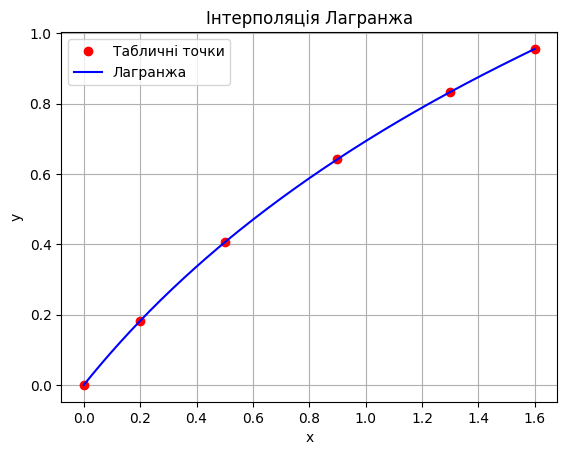

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Дані для інтерполяції
x = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

# Функція для інтерполяції Лагранжа
def lagrange_interpolation(x, y, xi):
    n = len(x)
    result = 0
    for i in range(n):
        term = y[i]
        for j in range(n):
            if j != i:
                term *= (xi - x[j]) / (x[i] - x[j])
        result += term
    return result

# Створюємо нові точки для побудови графіка
xi = np.linspace(min(x), max(x), 200)
yi_lagrange = np.array([lagrange_interpolation(x, y, xi_) for xi_ in xi])

# Побудова графіка
plt.plot(x, y, 'ro', label="Табличні точки")
plt.plot(xi, yi_lagrange, 'b-', label="Лагранжа")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Інтерполяція Лагранжа')
plt.grid(True)
plt.legend()
plt.show()


2. Побудувати інтерполяційний багаточлен Ньютона з використаннямтаблиці кінцевих функцій.

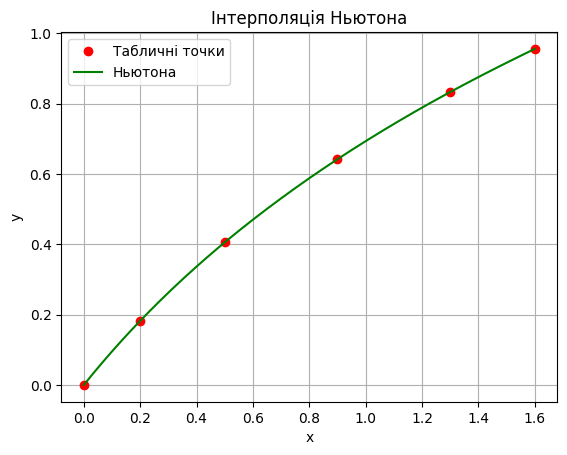

In [10]:
# Дані для інтерполяції
x = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

# Функція для інтерполяції Ньютона
def newton_interpolation(x, y, xi):
    n = len(x)
    diff_table = np.zeros((n, n))
    diff_table[:, 0] = y

    # Створюємо таблицю кінцевих різниць
    for j in range(1, n):
        for i in range(n - j):
            diff_table[i][j] = (diff_table[i + 1][j - 1] - diff_table[i][j - 1]) / (x[i + j] - x[i])

    # Обчислюємо поліном Ньютона
    result = diff_table[0][0]
    for j in range(1, n):
        term = diff_table[0][j]
        for k in range(j):
            term *= (xi - x[k])
        result += term
    return result

# Створюємо нові точки для інтерполяції
xi = np.linspace(min(x), max(x), 200)
yi_newton = np.array([newton_interpolation(x, y, xi_) for xi_ in xi])

# Побудова графіка
plt.plot(x, y, 'ro', label="Табличні точки")
plt.plot(xi, yi_newton, 'g-', label="Ньютона")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Інтерполяція Ньютона')
plt.grid(True)
plt.legend()
plt.show()


3. Побудувати ряд Тейлора 3-го порядку для аналітичної функції.

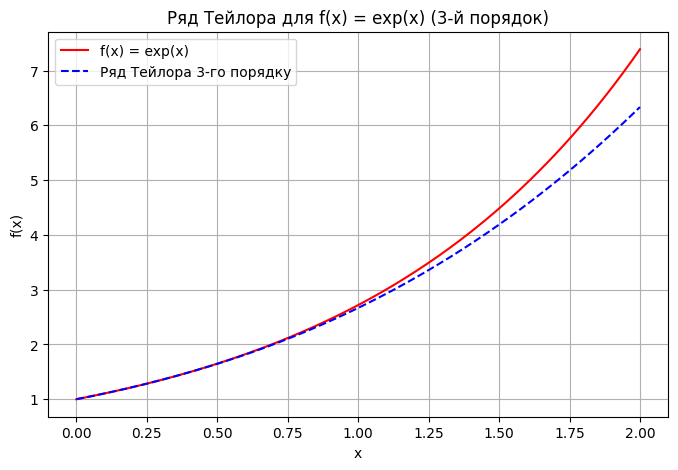

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Функція для обчислення ряду Тейлора для f(x) = exp(x)
def taylor_series_exp(x, n, x0=0):
    # Ініціалізація початкового значення ряду
    result = 0
    # Обчислення ряду Тейлора для exp(x) в точці x0 (за замовчуванням x0=0)
    for i in range(n + 1):
        result += (np.exp(x0) * (x - x0) ** i) / math.factorial(i)  # Використовуємо math.factorial
    return result

# Створюємо значення для x, щоб побудувати графік
x_values = np.linspace(0, 2, 200)

# Обчислюємо точні значення для exp(x) та наближення через ряд Тейлора 3-го порядку
exact_values = np.exp(x_values)
taylor_values = taylor_series_exp(x_values, 3)

# Побудова графіка
plt.figure(figsize=(8, 5))
plt.plot(x_values, exact_values, label='f(x) = exp(x)', color='red')
plt.plot(x_values, taylor_values, label='Ряд Тейлора 3-го порядку', linestyle='--', color='blue')
plt.title("Ряд Тейлора для f(x) = exp(x) (3-й порядок)")
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()



4. Побудувати кубічний сплайн.

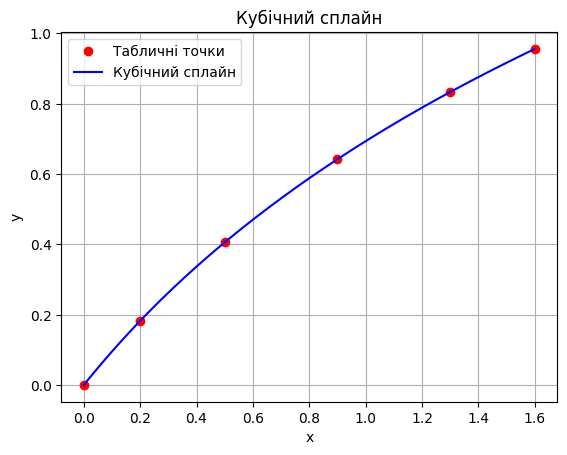

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# Дані для сплайну
x = np.array([0.0, 0.2, 0.5, 0.9, 1.3, 1.6])
y = np.array([0.000000, 0.182322, 0.405465, 0.641854, 0.832909, 0.955511])

# Побудова кубічного сплайну
cs = CubicSpline(x, y)

# Створюємо нові точки для побудови графіка сплайну
xi_spline = np.linspace(min(x), max(x), 200)
yi_spline = cs(xi_spline)

# Побудова графіка
plt.plot(x, y, 'ro', label="Табличні точки")
plt.plot(xi_spline, yi_spline, 'b-', label="Кубічний сплайн")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Кубічний сплайн')
plt.grid(True)
plt.legend()
plt.show()
